### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

In [19]:
from nltk.corpus.reader import reviews
!python -m pip install --upgrade pip 

In [2]:
!pip install --upgrade pandas

In [5]:
!pip install --upgrade matplotlib

In [4]:
!pip install --upgrade scikit-learn

  Using cached scikit_learn-1.4.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached threadpoolctl-3.4.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.4.2-cp311-cp311-win_amd64.whl (10.6 MB)
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.2 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 3.1 MB/s eta 0:00:00
Using cached threadpoolctl-3.4.0-py3-none-any.whl (17 kB)


In [6]:
!pip install --upgrade imbalanced-learn

  Using cached imbalanced_learn-0.12.2-py3-none-any.whl.metadata (8.2 kB)
Using cached imbalanced_learn-0.12.2-py3-none-any.whl (257 kB)


In [7]:
!pip install --upgrade statsmodels numpy 

In [8]:
!pip install --upgrade seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [9]:
!python.exe -m pip install --upgrade pip

In [10]:
!pip install -e .

Obtaining file:///C:/Users/david/OneDrive/Desktop/LSE%20Career%20Accelerator/Course%203%20Predictive%20Analytics/Projects%20Python/Turtle%20Games
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: db-missing-data
    Found existing installation: db-missing-data 0.1
    Not uninstalling db-missing-data at c:\users\david\onedrive\desktop\lse career accelerator\course 3 predictive analytics\projects python\turtle games, outside environment C:\Users\david\OneDrive\Desktop\LSE Career Accelerator\Course 3 Predictive Analytics\Projects Python\Turtle Games\.venv
    Can't uninstall 'db-missing-data'. No files were found to uninstall.
  Running setup.py develop for db-missing-data


In [12]:
!pip install --upgrade imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [ ]:
# Import necessary libraries.
# Import libraries.
import pandas as pd
import numpy as np
# import dataframes
from db_package import db_missing_data
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
# Load the data.
# Import the KMeans class.
from sklearn.cluster import KMeans 
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

# View the DataFrame.
df = pd.read_csv('turtle_reviews_clean.csv')
df.info()
print(df.head())
import warnings
warnings.filterwarnings('ignore')

In [39]:
print(df.product.nunique())

AttributeError: 'function' object has no attribute 'nunique'

## 2. Prepare the data

In [5]:
# Drop unnecessary columns.
df_potent = df.drop(columns=['review', 'summary'])
df_potent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 109.5+ KB


In [7]:
# label encode sex and education so we can use in correlation matrix
df_potent['gender'] = df_potent['gender'].astype('category')
df_potent['gender'] = df_potent['gender'].cat.codes

In [10]:
# same for education
df_potent['education'] = df_potent['education'].astype('category')
df_potent['education'] = df_potent['education'].cat.codes

In [12]:
#check unique values
df_potent.nunique()

gender              2
age                45
remuneration       64
spending_score     84
loyalty_points    627
education           5
product           200
dtype: int64

In [14]:
# role with the scatterplot
correlation_matrix = df_potent.corr()
print(correlation_matrix) 

                  gender       age  remuneration  spending_score  \
gender          1.000000  0.060452      0.038442       -0.029885   
age             0.060452  1.000000     -0.005708       -0.224334   
remuneration    0.038442 -0.005708      1.000000        0.005612   
spending_score -0.029885 -0.224334      0.005612        1.000000   
loyalty_points -0.020344 -0.042445      0.616065        0.672310   
education      -0.100340 -0.079405     -0.081758        0.079003   
product         0.012078  0.003081      0.305309       -0.001649   

                loyalty_points  education   product  
gender               -0.020344  -0.100340  0.012078  
age                  -0.042445  -0.079405  0.003081  
remuneration          0.616065  -0.081758  0.305309  
spending_score        0.672310   0.079003 -0.001649  
loyalty_points        1.000000  -0.005786  0.183600  
education            -0.005786   1.000000  0.012782  
product               0.183600   0.012782  1.000000  


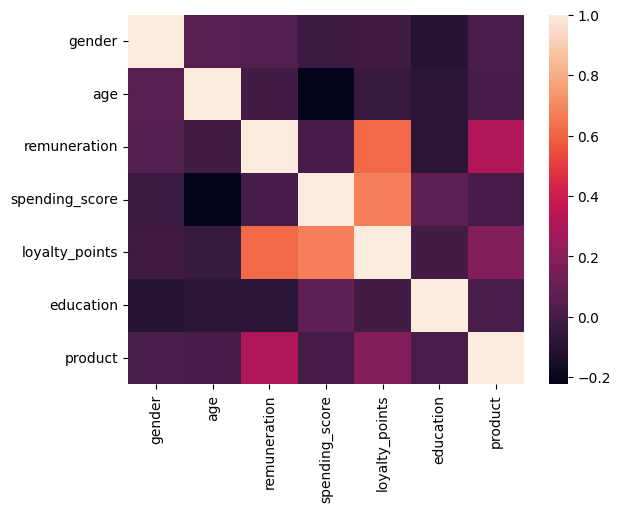

In [15]:
# plot the matrix
ax = sns.heatmap(correlation_matrix)

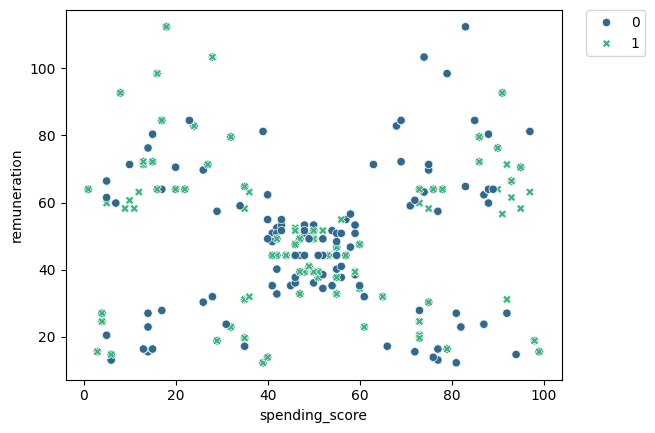

In [21]:
# Create a scatterplot with Seaborn.
# Import matplotlib
import matplotlib.pyplot as plt

# Create scatterplot
scatter = sns.scatterplot(x='spending_score', y='remuneration', data=df_potent,
                          hue='gender', style='gender', palette='viridis')

# Move the legend to an empty part of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### 1. The central group: This suggests most of your data points have values around the mean for both 'spending_score' and 'remuneration'. This is a common pattern if your data is somewhat normally distributed.
### 2.Spread arms in a cross shape: This could potentially indicate a relationship between 'spending_score' and 'remuneration'. The cross shape suggests that when one variable increases, the other variable tends to either increase or decrease, forming a cross shape in the plot. However, keep in mind that scatter plots can show correlation but not causation.


## 3. Elbow and silhoutte methods

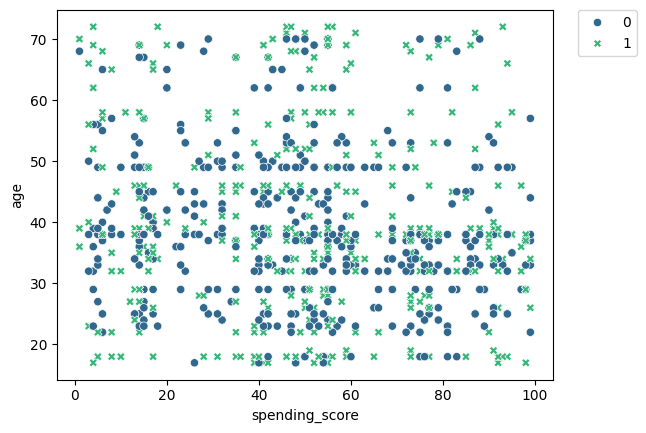

In [22]:
# Create a scatterplot with Seaborn.
# Import matplotlib
import matplotlib.pyplot as plt

# Create scatterplot
scatter = sns.scatterplot(x='spending_score', y='age', data=df_potent,
                          hue='gender', style='gender', palette='viridis')

# Move the legend to an empty part of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

This pattern might suggest that the two variables you're plotting have a discrete relationship, especially when you mention vertical lines. It might also suggest that one variable (the one on the x-axis) may have multiple corresponding values of the other variable (the one on the y-axis), resulting in vertical lines.
- Let's say the X-axis represents time (like "hours of the day") and Y-axis represents an activity (like "people entering a shop"). 
- If at every single hour of the day, different numbers of people enter the shop, it could result in a vertical line at each hour, with the height representing the range of people entered.

This might not perfectly map the scenario but demonstrates the theme - if we're seeing vertical lines, the y-variable may not be a function of x-variable (meaning, for a single x-value, there can be more than one y-value).
Remember, the interpretation can largely depend on what the variables actually represent - what I've described is a common interpretation, but things can change based on the specifics of your data.

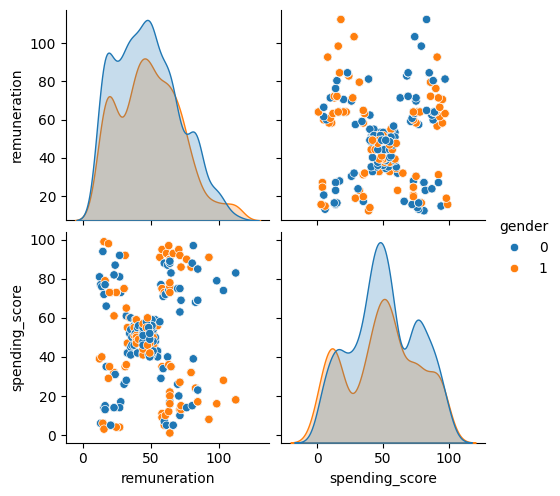

In [24]:
# Determine the number of clusters: Elbow method.
# Create a pairplot with Seaborn.
x = df_potent[['remuneration', 'spending_score']]

sns.pairplot(df_potent,
             vars=x,
             hue='gender',
             diag_kind='kde')

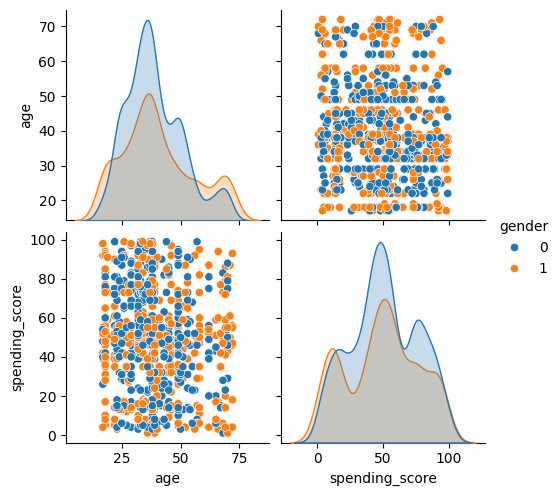

In [25]:
# Determine the number of clusters: Elbow method.
# Create a pairplot with Seaborn.
x = df_potent[['age', 'spending_score']]

sns.pairplot(df_potent,
             vars=x,
             hue='gender',
             diag_kind='kde')


In [27]:
# Elbow meth
# Select the desired columns
x = df[['spending_score', 'remuneration', 'age']]

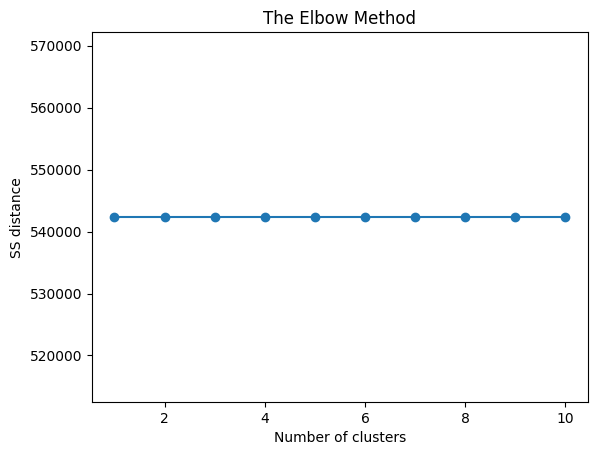

In [31]:
# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11): #loop for 11 times, 2 is minimum (cant have 1 clluster
    kmeans = KMeans(n_clusters=6,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

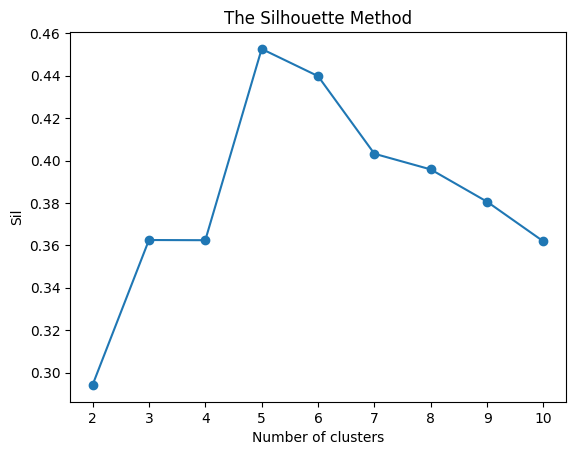

In [29]:
# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

In [ ]:
# Explaining K-Means and the clusters
## In Particular the value of 'k' & Clustersduring the iterations

 Tthe number of clusters in KMeans (the 'k' in KMeans) isn't always equal to the number of columns used in the analysis. The 'k' in KMeans signifies the number of clusters you want the algorithm to partition your data into, whereas the columns in your data represent different features (dimensions) of that data.
Example:

If you have 5 columns (features like age, income, years of education, etc.) and you want to group your data into 3 distinct segments, you would use KMeans with k = 3. This will cluster the multidimensional (5-dimensions in this case) data into 3 specific clusters.
However, even if you have only 2 columns (aka features), but you want to partition your data into 5 specific clusters, you would use KMeans with k = 5.
The key point is that the 'k' in KMeans refers to groups (clusters) of data points you want to create, not the number of columns or features you have.
Additionally. when the number of dimensions (features) becomes too large it can make it more difficult for KMeans to find meaningful clusters. This is apparently known as the "curse of dimensionality". Dimensionality reduction methods (like Principal Component Analysis, PCA) can be used in these instances to reduce the number of features before applying KMeans.

## 4. Evaluate k-means model at different values of *k*

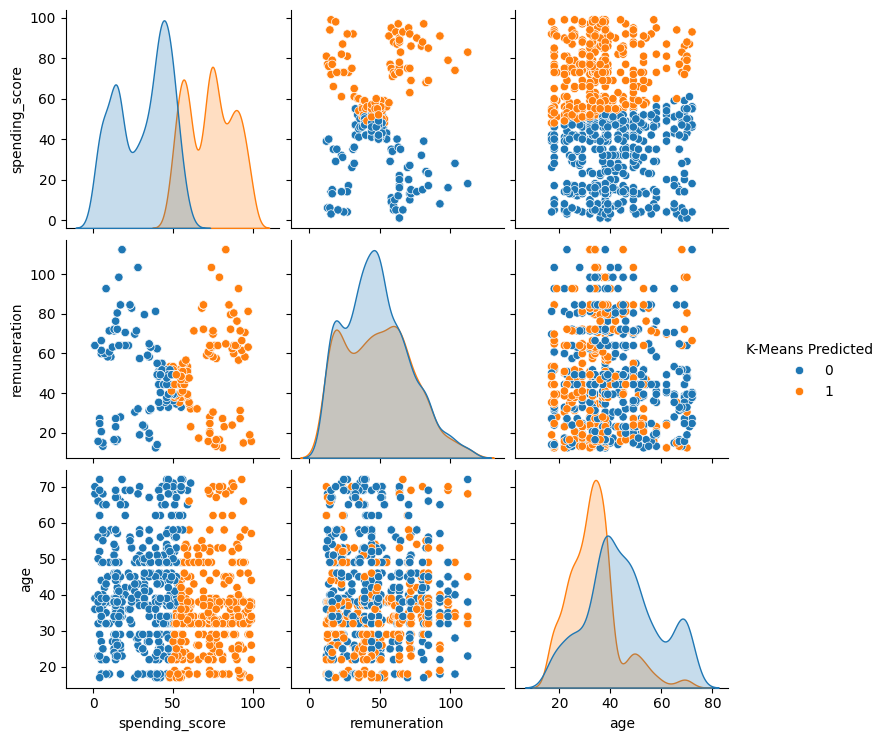

In [34]:
# Apply the final model.
# Use three clusters.
kmeans = KMeans(n_clusters = 2, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

## 5. Next Steps

Yes, you can merge two CSVs on the 'product' column even if the IDs appear more than once in either or both of the CSVs. Pandas merge function handles this situation very well. It actually performs a SQL-like join operation, so duplicate keys are not a problem.
Here is a general way to merge two DataFrames on the 'product' column:

import pandas as pd

# assuming you have two dataframes df1 and df2
merged_df = pd.merge(df1, df2, on='product', how='inner')


Here's what each parameter does:
df1, df2: These are the two dataframes you want to merge.
on='product': This tells pandas to use the 'product' column as the merge key.
how='inner': This specifies the type of merge to be performed. 'inner' means that only the keys that are in both dataframes will be included in the resulting merged dataframe.
Remember to replace 'df1' and 'df2' with your actual dataframes.
This will result in a DataFrame that has all the columns from both dataframes, matched up where the 'product' values are the same.
Keep in mind that if 'product' is not unique in both dataframes, the merge operation will result in more rows than either original dataframe because the merge operation forms a Cartesian product. For example, if 'product' id '1' appears 3 times in df1 and 2 times in df2, there will be 3*2=6 rows for 'product' id '1' in the merged dataframe. For every unique pair of rows with 'product' id '1' in df1 and df2, there will be a separate row in the merged dataframe.


## Can't you join on the index??
You can join on the index as well! To do this, you would use the join() function instead of merge(), or you could use merge() with the parameters left_index=True and right_index=True.
Here's how one might join(): # Future me: "I've worked out a better way since there is in fact a form of unique ID if you assume that all product numbers are the same game  for the analysis."

In [ ]:
merged_df = df1.join(, how='inner')


OR with merge( )

In [ ]:
merged_df = df1.merge(, left_index=True, right_index=True, how='inner')

In both these cases, how='inner' specifies an inner join which means only the indexes present in both dataframes will be included in the final merged dataframe.
And it's perfectly all right to join on index. There's no strict requirement that joins need to be done only on meaningful values. It totally depends on the specific use case. If two dataframes have same index and those indexes represent same entities in both dataframes, then joining on index makes complete sense.
Just remember, if you're planning on merging on the index, make sure your indices in both DataFrames are meaningful and align correctly to give you the desired result.

## 7. Check the second CSV file to see if it directly correlates with the first CSV file

***Your observations here...***

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

In [11]:
#

  Using cached setuptools-69.5.1-py3-none-any.whl.metadata (6.2 kB)
  Using cached wheel-0.43.0-py3-none-any.whl.metadata (2.2 kB)
Using cached setuptools-69.5.1-py3-none-any.whl (894 kB)
Using cached wheel-0.43.0-py3-none-any.whl (65 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.41.2
    Uninstalling wheel-0.41.2:
      Successfully uninstalled wheel-0.41.2
  Attempting uninstall: setuptools
    Found existing installation: setuptools 68.2.0
    Uninstalling setuptools-68.2.0:
      Successfully uninstalled setuptools-68.2.0
  Using cached spacy-3.7.4-cp311-cp311-win_amd64.whl.metadata (27 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata (2.0 kB)
  Using cached cymem-2.0.8-cp311-cp311-win_amd64.whl.metadata (8.6 kB)
  Using cached preshed-3.0.9-cp311-cp311-win_amd64.whl.metadata (2.2 kB)
  Usi

In [4]:
### Python
!python -m pip install --upgrade pip
!pip install --upgrade pandas
!pip install -U pip setuptools wheel 
!pip install -U spacy
!python -m spacy download en_core_web_sm
!pip install --upgrade nltk
!pip install  seaborn
!pip install wordcloud

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 660.6 kB/s eta 0:00:20
     ---------------------------------------- 0.1/12.8 MB 1.3 MB/s eta 0:00:10
     - -------------------------------------- 0.6/12.8 MB 4.8 MB/s eta 0:00:03
     --------- ------------------------------ 3.0/12.8 MB 17.7 MB/s eta 0:00:01
     ------------------- -------------------- 6.2/12.8 MB 28.6 MB/s eta 0:00:01
     ---------------------------- ----------- 9.0/12.8 MB 34.0 MB/s eta 0:00:01
     ------------------------------------- - 12.4/12.8 MB 65.6 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 59.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [9]:
import nltk

In [11]:
!pip install --upgrade punkt
nltk.download('punkt')


ERROR: Could not find a version that satisfies the requirement punkt (from versions: none)
ERROR: No matching distribution found for punkt
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 1. Load and explore the data

In [12]:
# imports
from textblob import TextBlob
import pandas as pd
import numpy as np
# Install the # Install the required tokenisation function.
from nltk.tokenize import sent_tokenize

### A note on missing values: 
These have been checked for during the wraongling phase in 'R', alongside duplicates. The data used here is now from after the 'R' Wrangling

# 1. Read in thea data and backup
I had written a large introduction here, which promptply got destroyed by a PyCharm crash. I've summarised the wider thoughts in the supporting documentation anyway, but once again have aimed to find a balance between following the 'sort of' opptional guidelines, and aiming for information that would be most useful for a business with such a limited set of data.
So the flow generally follows the workbook, however what I would want to garner from this exercise were I running , or advising on the business would be:
1. As listed in the guidelines
2. When the reviews of importance were recieved, given the data spans a timeline of roughly 1980 to 2016 (with online comments likely to have been generated from 2000 to 2016. 
Since the timeline and mechanism of measuring it took so long, i'm unlikely to have the 'sentiment over time' completed, but will endeavour to try.


 df3['review'] and df3['summary'] each return a pandas Series, which lists all the reviews or summaries, then iterates over the list using a simple 'for' loop.

In [2]:
import pandas as pd

df3 = pd.read_csv('turtle_reviews_clean.csv')

# Create a backup
df_backup = df3.copy()

# Now you can safely copy from df_backup
df3 = df_backup.copy()
print(df3.equals(df_backup))  # This should print: True


# iterate over the review column
for review in df3['review']:
	# Process each review
	print(review)

# iterate over the summary column
for summary in df3['summary']:
	# Process each summary
	print(summary)

# If you want to iterate over both columns together
for idx, row in df3.iterrows():
	review = row['review']
	summary = row['summary']
	# Process each review and summary
	print(review, summary)



True
When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. The only reason that I gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. Other than that, it drops the ball completely.
An Open Letter to GaleForce9*:

Your unpainted miniatures are very not bad. Your spell cards are great. Your board games are "meh". Your DM screens, however, are freaking terrible. I'm still waiting for a single screen that isn't polluted with pointless artwork where useful, reference-able tables should be. Once again, you've created a single use screen that is only useful when running the "Storm King's Thunder" adventure. Even despite the fact that it's geared to that adventure path, it's usefulness negligible, at best. I massive swath of the inner panel is wasted on artw

Note: Most of these comments are just copy and pastes from my 'notion' database i have spent countless hours writing. Mostly I get the confusing documentation or sometimes class notes and translate it from 'techno-babble' to (barely) average persons language, but it has custom walkthroughs i've created for such tasks like this.
"The punkt is a crucial part of Natural Language Processing (NLP) with the NLTK (Natural Language Toolkit) library in Python. It stands for Part-Of-Speech and is a pre-trained unsupervised machine learning model for tokenizing text. 

It's particularly good with languages where sentences or phrases can be tokenized just by splitting up the text where there's whitespace between words."

### In short, its tokenising the content in both the 'review' and 'summary' columns. NLTK is king for this, as is the free book online :

# Punkt!
"The function nltk.download('punkt'), specifically, is used to download the punkt package which includes a pre-trained Punkt tokenizer for tokenization. This means it divides a text into a list of sentences, by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.

So when running the sent_tokenize function from NLTK, it actually uses this punkt package to do the tokenisation from NLTK

In [3]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')  # Download the Punkt tokenizer


# Tokenize review and summary
df3['tokenized_review'] = df3['review'].apply(word_tokenize)
df3['tokenized_summary'] = df3['summary'].apply(word_tokenize)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Cleaning the data for sentimment Analysis
### A Function to remove punctuation and convert to lower case
In my notion, I actually had:
import string
tokenised_word = [word.translate(str.maketrans('', '', string.punctuation)).lower().strip() for word in tokenised_word if word.translate(str.maketrans('', '', string.punctuation)).lower().strip() != '']

From when i was doing the class exasmples, but for the pandas DataFrame operation, it work a little differently than just a regular operations on a list. A minor  modification to the list comprehension so that it can work on each row of the DataFrame column, and we're good to go.

In [4]:
import string
# Remove all ther punctuation and empty space and caps (bit like the'R' tolower)


# Function to remove punctuation and convert to lower case
def process_words (tokenised_words):
	return [word.translate(str.maketrans('', '', string.punctuation)).lower().strip()
	        for word in tokenised_words
	        if word.translate(str.maketrans('', '', string.punctuation)).lower().strip() != '']


df3['tokenized_summary'] = df3['tokenized_summary'].apply(process_words)
df3['tokenized_summary'] = df3['tokenized_summary'].apply(process_words)


In [5]:
### Grabbing the frequencxy getting the frequency distribution of the words in the dataset sd ultimately we're looking tanalyse them minus the stopwords. Used to save ourselves from red herrings in the data.

##  Stopwordsleft out for the first worecloud iteration

In [6]:
# Explore data set.from nltk.probability and import FreqDist
from nltk.probability import FreqDist

# Calculate and print frequency distribution
reviews_freqdist = FreqDist(word for word_list in df3['tokenized_review'] for word in word_list)
print(reviews_freqdist.most_common())

summaries_freqdist = FreqDist(word for word_list in df3['tokenized_summary'] for word in word_list)
print(summaries_freqdist.most_common())


[('.', 6508), ('the', 4623), (',', 3793), ('and', 3179), ('to', 3146), ('a', 3050), ('of', 2474), ('I', 2294), ('it', 1977), ('is', 1820), ('game', 1648), ('for', 1511), ('this', 1340), ('with', 1244), ('you', 1194), ('in', 1089), ('that', 1059), ('!', 1049), ('are', 985), ('The', 829), ('have', 765), ('but', 720), ("'s", 684), ('as', 684), ('my', 665), ('on', 611), ("n't", 611), ('was', 584), ('be', 558), ('can', 551), ('It', 510), ('play', 495), ('fun', 491), (')', 483), ('one', 483), ('more', 478), ('so', 449), ('or', 446), ('(', 438), ('all', 438), ('not', 436), ('This', 433), ('like', 405), ('they', 401), ('great', 377), ('do', 374), ('at', 348), ('just', 348), ('out', 341), ('D', 338), ('very', 331), ('them', 329), ('we', 327), ("''", 317), ('get', 313), ('up', 307), ('My', 302), ('if', 299), ('an', 295), ('cards', 289), ('would', 289), ('time', 289), ('really', 288), ('tiles', 282), ('your', 278), ('will', 276), ('some', 266), ('from', 266), ('book', 265), ('when', 261), ('love'

### This is getting the frequency distribution of the words in the dataset.
Note: install wordcloud here if not done so already

In [7]:
### Not to demolish the stopwords, and re-reun. Could have done this earlier but its useful to see.
# Calculate and print frequency distribution
reviews_freqdist = FreqDist(word for word_list in df3['tokenized_review'] for word in word_list)
print(reviews_freqdist.most_common())

summaries_freqdist = FreqDist(word for word_list in df3['tokenized_summary'] for word in word_list)
print(summaries_freqdist.most_common())

[('.', 6508), ('the', 4623), (',', 3793), ('and', 3179), ('to', 3146), ('a', 3050), ('of', 2474), ('I', 2294), ('it', 1977), ('is', 1820), ('game', 1648), ('for', 1511), ('this', 1340), ('with', 1244), ('you', 1194), ('in', 1089), ('that', 1059), ('!', 1049), ('are', 985), ('The', 829), ('have', 765), ('but', 720), ("'s", 684), ('as', 684), ('my', 665), ('on', 611), ("n't", 611), ('was', 584), ('be', 558), ('can', 551), ('It', 510), ('play', 495), ('fun', 491), (')', 483), ('one', 483), ('more', 478), ('so', 449), ('or', 446), ('(', 438), ('all', 438), ('not', 436), ('This', 433), ('like', 405), ('they', 401), ('great', 377), ('do', 374), ('at', 348), ('just', 348), ('out', 341), ('D', 338), ('very', 331), ('them', 329), ('we', 327), ("''", 317), ('get', 313), ('up', 307), ('My', 302), ('if', 299), ('an', 295), ('cards', 289), ('would', 289), ('time', 289), ('really', 288), ('tiles', 282), ('your', 278), ('will', 276), ('some', 266), ('from', 266), ('book', 265), ('when', 261), ('love'

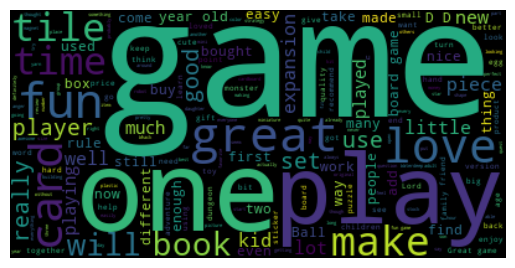

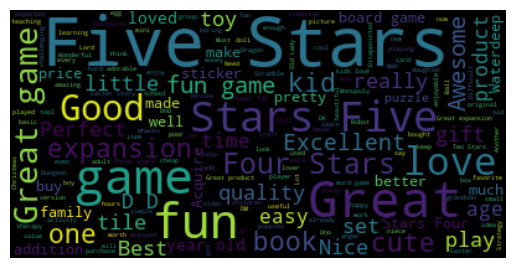

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all reviews and summaries
all_reviews = ' '.join(df3['review'])
all_summaries = ' '.join(df3['summary'])

# Generate wordcloud
reviews_wordcloud = WordCloud().generate(all_reviews)
summaries_wordcloud = WordCloud().generate(all_summaries)

# Display wordcloud
plt.imshow(reviews_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

plt.imshow(summaries_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [9]:
### I also made an attempt at doing sentiment analysis toweards the end of my mammoth .RMD file, i couldn't work out the prediction but the wordclouds were really interesting. Use sentiment analyser before SW

# Adding Stopwords

In [10]:
# Remove the stop words and plot again
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))


def remove_stopwords (tokens):
	return [word for word in tokens if word not in stop_words]


df3['tokenized_review'] = df3['tokenized_review'].apply(remove_stopwords)
df3['tokenized_summary'] = df3['tokenized_summary'].apply(remove_stopwords)

In [11]:
# Redo the wordcloud after Stopwords

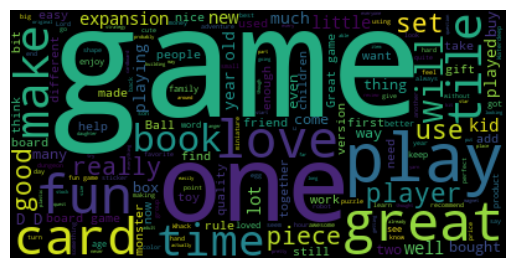

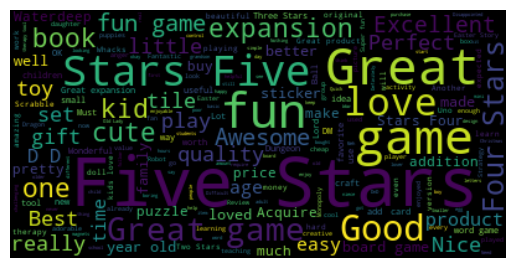

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all reviews and summaries
all_reviews = ' '.join(df3['review'])
all_summaries = ' '.join(df3['summary'])

# Generate wordcloud
reviews_wordcloud = WordCloud().generate(all_reviews)
summaries_wordcloud = WordCloud().generate(all_summaries)

# Display wordcloud
plt.imshow(reviews_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

plt.imshow(summaries_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Obtaining the polarity scores

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

# Initialize sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Get sentiment scores
df3['review_sentiment'] = df3['review'].apply(lambda review: sia.polarity_scores(review))
df3['summary_sentiment'] = df3['summary'].apply(lambda summary: sia.polarity_scores(summary))



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

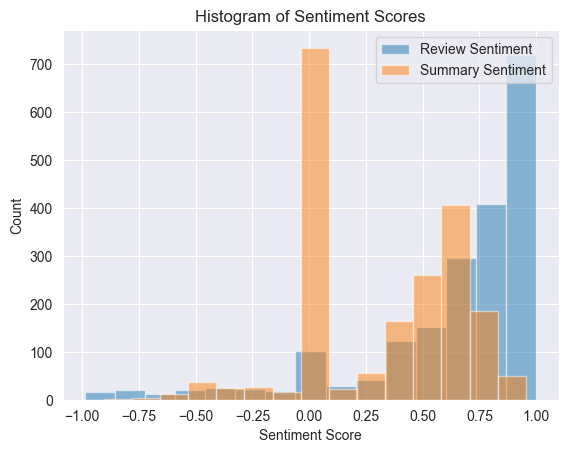

In [17]:
# Determine polarity of both columns. 
# Extract compound sentiment score
df3['review_compound'] = df3['review_sentiment'].apply(lambda score_dict: score_dict['compound'])
df3['summary_compound'] = df3['summary_sentiment'].apply(lambda score_dict: score_dict['compound'])

# Plot histogram of review sentiment
plt.hist(df3['review_compound'], bins=15, alpha=0.5, label='Review Sentiment')
plt.hist(df3['summary_compound'], bins=15, alpha=0.5, label='Summary Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.title('Histogram of Sentiment Scores')
plt.legend(loc='upper right')
plt.show()


# View output.


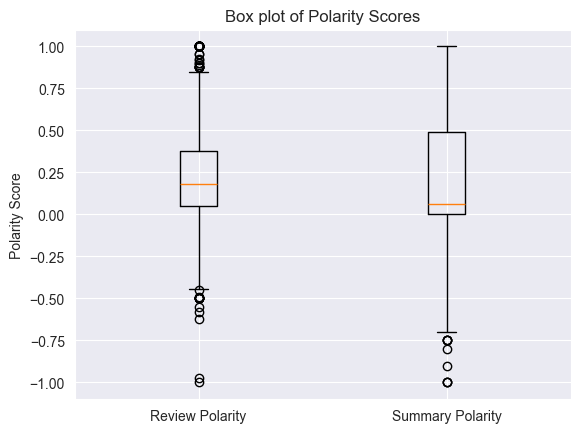

In [18]:

from textblob import TextBlob
import matplotlib.pyplot as plt


# Define a function to extract polarity
def generate_polarity (comment):
	'''Extract polarity score (-1 to +1) for each comment'''
	return TextBlob(comment).sentiment[0]


# Apply the function to the 'review' and 'summary' columns
df3['review_polarity'] = df3['review'].apply(generate_polarity)
df3['summary_polarity'] = df3['summary'].apply(generate_polarity)

# Generate a boxplot for the polarity scores
plt.boxplot([df3['review_polarity'], df3['summary_polarity']], labels=['Review Polarity', 'Summary Polarity'])
plt.title('Box plot of Polarity Scores')
plt.ylabel('Polarity Score')
plt.show()


# View output.


# For the histogram of polarity i split it up, and i coulndt find two colours that really worked well whilst both on one screen.
It wasn;'t so bad withn sentiment but it looked poor with two on at once.

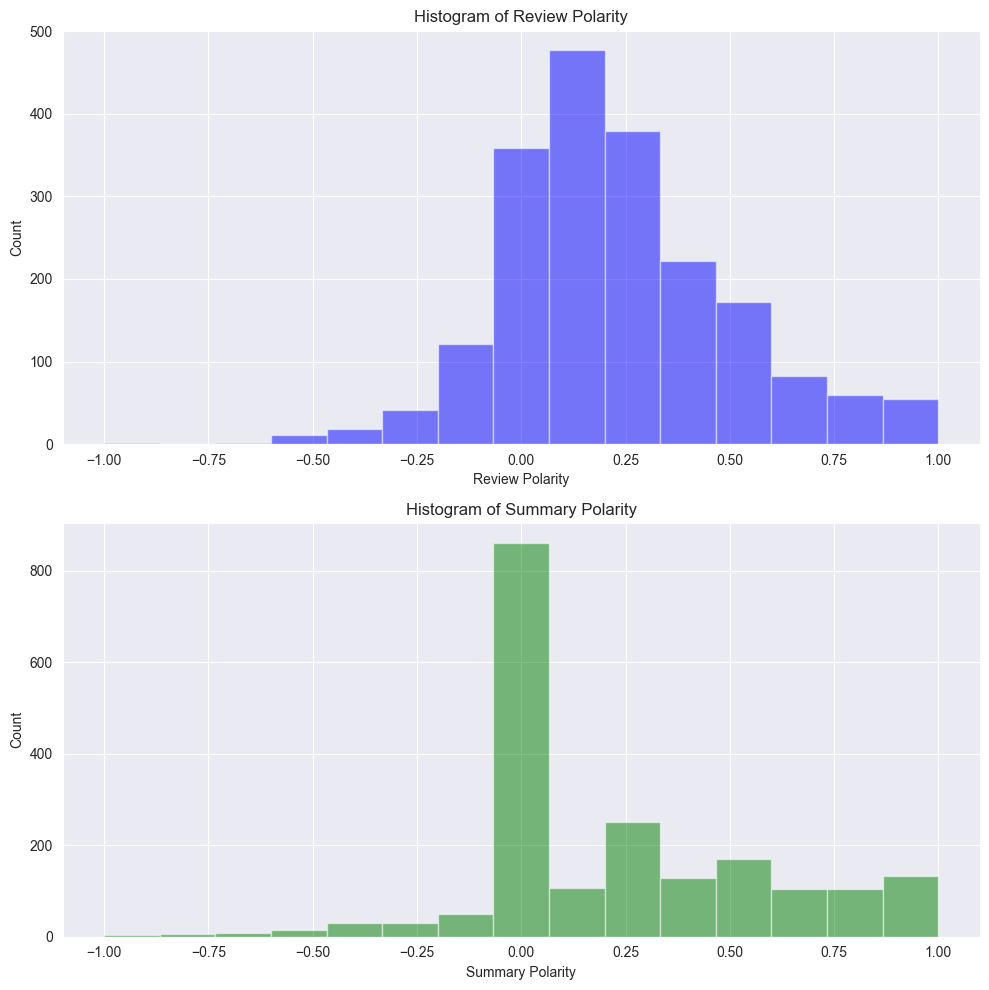

In [19]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity

# Create two subplots for the two histograms
fig, axs = plt.subplots(2, figsize=(10, 10))

# Plot histogram of review polarity
axs[0].hist(df3['review_polarity'], bins=15, alpha=0.5, color='blue')
axs[0].set_title('Histogram of Review Polarity')
axs[0].set_xlabel('Review Polarity')
axs[0].set_ylabel('Count')

# Plot histogram of summary polarity
axs[1].hist(df3['summary_polarity'], bins=15, alpha=0.5, color='green')
axs[1].set_title('Histogram of Summary Polarity')
axs[1].set_xlabel('Summary Polarity')
axs[1].set_ylabel('Count')

# Display the plots
plt.tight_layout()
plt.show()


In [20]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [22]:
# Top 20 positive reviews.
# Sort the DataFrame based on 'review_polarity' and 'summary_polarity' and get the top 20
top_20_review = df3.sort_values(by='review_polarity', ascending=False).head(20)
top_20_summary = df3.sort_values(by='summary_polarity', ascending=False).head(20)

# If you want to print these:
for idx, row in top_20_review.iterrows():
	print("Product: ", row['product'])
	print("Review: ", row['review'])
	print("Sentiment Score: ", row['review_polarity'])
	print("\n")

for idx, row in top_20_summary.iterrows():
	print("Product: ", row['product'])
	print("Summary: ", row['summary'])
	print("Sentiment Score: ", row['summary_polarity'])
	print("\n")


# View output.


Product:  1497
Review:  great!!
Sentiment Score:  1.0


Product:  1183
Review:  Great resource for BHIS care coordinators!! Works well with kids and teens on what it says it does!!
Sentiment Score:  1.0


Product:  3645
Review:  Absolutely great pictures even before coloring!
Sentiment Score:  1.0


Product:  4477
Review:  Awesome
Sentiment Score:  1.0


Product:  6471
Review:  best set. buy 2 if you have the means.
Sentiment Score:  1.0


Product:  3896
Review:  Great!
Sentiment Score:  1.0


Product:  8923
Review:  Awesome addition to my rpg GM system.
Sentiment Score:  1.0


Product:  9119
Review:  Perfect for tutoring my grandson in spelling.
Sentiment Score:  1.0


Product:  9119
Review:  My grandson loved it!!
Sentiment Score:  1.0


Product:  830
Review:  Great product!  Arrived on time.
Sentiment Score:  1.0


Product:  9612
Review:  Great Seller!!! Happy with my purchase!!! 5 starrrr
Sentiment Score:  1.0


Product:  11004
Review:  Excellent toy to simulate thought!
Sentiment 

In [30]:
# Top 20 Negative reviews.
# Sort the DataFrame based on 'review_polarity' and 'summary_polarity' and get the top 20
bottom_20_review = df3.sort_values(by='review_polarity', ascending=True).head(20)
bottom_20_summary = df3.sort_values(by='summary_polarity', ascending=True).head(20)

# If you want to print these:
for idx, row in top_20_review.iterrows():
	print("Product: ", row['product'])
	print("Review: ", row['review'])
	print("Sentiment Score: ", row['review_polarity'])
	print("\n")

for idx, row in top_20_summary.iterrows():
	print("Product: ", row['product'])
	print("Summary: ", row['summary'])
	print("Sentiment Score: ", row['summary_polarity'])
	print("\n")


# View output.


Product:  1459
Review:  BOOO  UNLES YOU ARE PATIENT KNOW HOW TO MEASURE I DIDN'T HAVE THE PATIENCE NEITHER DID MY DAUGHTER.  BORING UNLESS YOU ARE A CRAFT PERSON WHICH I AM NOT.
Sentiment Score:  -1.0


Product:  6504
Review:  Incomplete kit!  Very disappointing!
Sentiment Score:  -0.9750000000000001


Product:  4047
Review:  If you, like me, used to play D&D, but now you and your friends "growed up" and can't be together because all the responsibilities and bla bla bla... this game is for you! Come to the Dungeon!
Sentiment Score:  -0.625


Product:  2253
Review:  I'm sorry. I just find this product to be boring and, to be frank, juvenile.
Sentiment Score:  -0.5833333333333334


Product:  11056
Review:  One of my staff will be using this game soon, so I don't know how well it works as yet, but after looking at the cards, I believe it will be helpful in getting a conversation started regarding anger and what to do to control it.
Sentiment Score:  -0.55


Product:  3967
Review:  Scrabbl

This sorts the DataFrame by the review_polarity and summary_polarity columns in descending order and takes the first 20 rows, effectively getting the top 20 most positive reviews and summaries.
Then, it loops through all teh rows in the top 20 per the polarity, prints out the product code, review or summary, and the polarity score.
You can then basdically switch up the order and retrieve the top 20 most negative reviews and summaries. Plus later I will change the display to show only the product numbers, so we can measure them loosely by time :

In [23]:
# My attempt to make Sentiment box plots that is both readable and not ridiculously big.

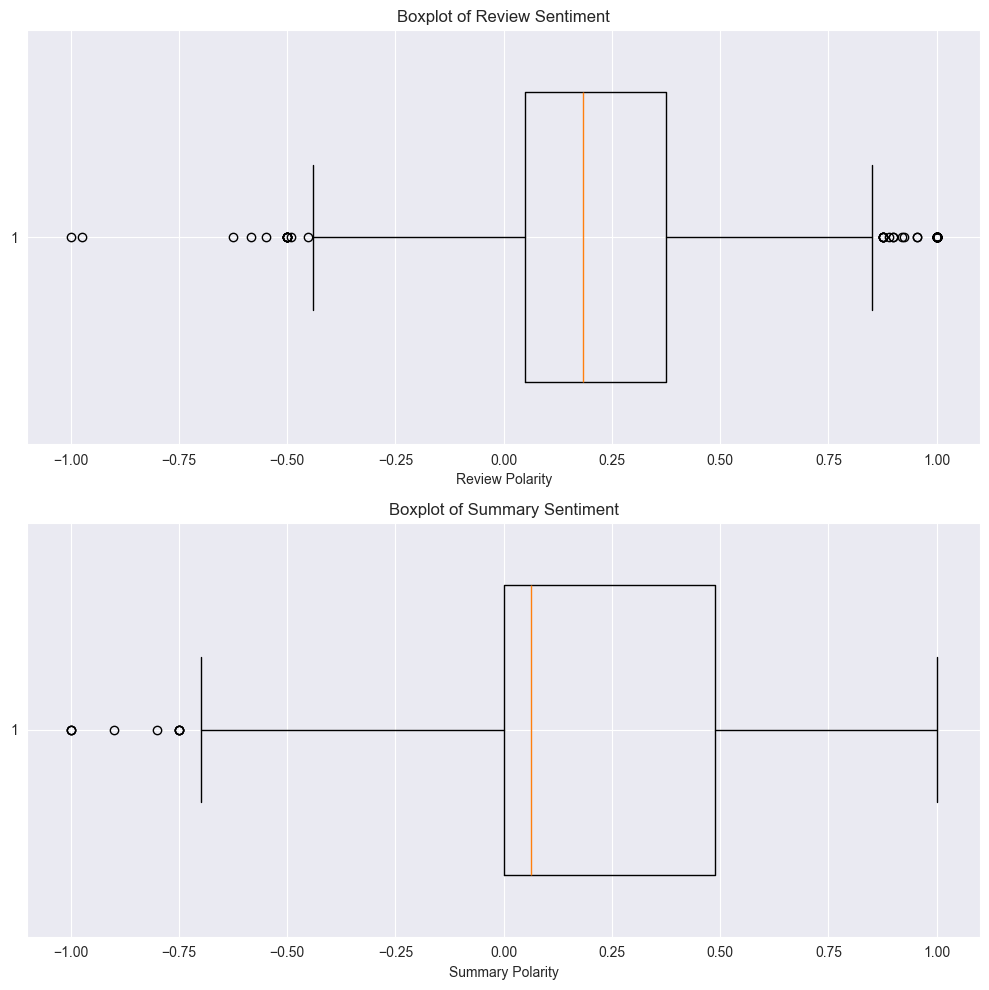

In [31]:
# two subplots for the boxplots
fig, axs = plt.subplots(2, figsize=(10, 10))
# Apply the function to the 'review' and 'summary' columns
df3['review_polarity'] = df3['review'].apply(generate_polarity)
df3['summary_polarity'] = df3['summary'].apply(generate_polarity)
# Boxplot of review sentiment
axs[0].boxplot(df3['review_polarity'], vert=False, widths=0.7)
axs[0].set_title('Boxplot of Review Sentiment')
axs[0].set_xlabel('Review Polarity')

# Boxplot of summary sentiment
axs[1].boxplot(df3['summary_polarity'], vert=False, widths=0.7)
axs[1].set_title('Boxplot of Summary Sentiment')
axs[1].set_xlabel('Summary Polarity')

# Display the plots
plt.tight_layout()
plt.show()

# Finding the product codes for estimated date of reviews

In [32]:
# Top 20 positive reviewss for use with Gen
# Sort the DataFrame based on 'review_polarity' and 'summary_polarity' and get the top 20
top_20_review = df3.sort_values(by='review_polarity', ascending=False).head(20)
top_20_summary = df3.sort_values(by='summary_polarity', ascending=False).head(20)

# If you want to print these:
for idx, row in top_20_review.iterrows():
	print("Product: ", row['product'])
	print("\n")

for idx, row in top_20_summary.iterrows():
	print("Product: ", row['product'])
	print("\n")


# View output.


Product:  1497


Product:  1183


Product:  3645


Product:  4477


Product:  6471


Product:  3896


Product:  8923


Product:  9119


Product:  9119


Product:  830


Product:  9612


Product:  11004


Product:  3267


Product:  618


Product:  577


Product:  9080


Product:  3427


Product:  1501


Product:  5430


Product:  107


Product:  11025


Product:  515


Product:  10995


Product:  1463


Product:  11004


Product:  1506


Product:  2285


Product:  1592


Product:  811


Product:  979


Product:  1945


Product:  1577


Product:  10232


Product:  1618


Product:  3896


Product:  10240


Product:  4415


Product:  3153


Product:  3678


Product:  3478




In [33]:
# Top 20 positive reviewss for use with Gen
# Sort the DataFrame based on 'review_polarity' and 'summary_polarity' and get the top 20
bottom_20_review = df3.sort_values(by='review_polarity', ascending=True).head(20)
bottom_20_summary = df3.sort_values(by='summary_polarity', ascending=True).head(20)

# If you want to print these:
for idx, row in top_20_review.iterrows():
	print("Product: ", row['product'])
	print("\n")

for idx, row in top_20_summary.iterrows():
	print("Product: ", row['product'])
	print("\n")


# View output.


Product:  1497


Product:  1183


Product:  3645


Product:  4477


Product:  6471


Product:  3896


Product:  8923


Product:  9119


Product:  9119


Product:  830


Product:  9612


Product:  11004


Product:  3267


Product:  618


Product:  577


Product:  9080


Product:  3427


Product:  1501


Product:  5430


Product:  107


Product:  11025


Product:  515


Product:  10995


Product:  1463


Product:  11004


Product:  1506


Product:  2285


Product:  1592


Product:  811


Product:  979


Product:  1945


Product:  1577


Product:  10232


Product:  1618


Product:  3896


Product:  10240


Product:  4415


Product:  3153


Product:  3678


Product:  3478




# save the results in a DF, to be joined (sort of) with the turetle_sales

In [34]:
# For top 20 reviews
top_20_review[['product']].to_csv('top_20_review.csv', index=False)
# For top 20 summaries
top_20_summary[['product']].to_csv('top_20_summary.csv', index=False)

In [35]:
# For top 20 reviews
bottom_20_review[['product']].to_csv('bottom_20_review.csv', index=False)
# For top 20 summaries
bottom_20_summary[['product']].to_csv('bottom_20_summary.csv', index=False)